##UTP AI

* Muhammad Rifqi Al Ardabili
* 2217051128
* D
* https://github.com/rifqibili/UTP-AI

Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Identifikasi Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/rifqibili/UTP-AI/main/advertising.csv")

Alasan memilih Dataset ini

1. Dataset ini mudah diakses melalui repositori online seperti GitHub atau Kaggle
2. Dataset ini memiliki ukuran yang memadai dan kualitas yang baik
3. Dataset ini menyediakan keanekaragaman fitur
4. Dataset ini memberikan berbagai kemungkinan tujuan analisis yang menarik, seperti prediksi kinerja iklan, segmentasi audiens, atau pengoptimalan alokasi anggaran iklan.



In [3]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
data.shape

(1000, 10)

In [8]:
print("Data eksplorasi dengan mengecek distribusi label")
print(data.groupby("Clicked on Ad").size())

Data eksplorasi dengan mengecek distribusi label
Clicked on Ad
0    500
1    500
dtype: int64


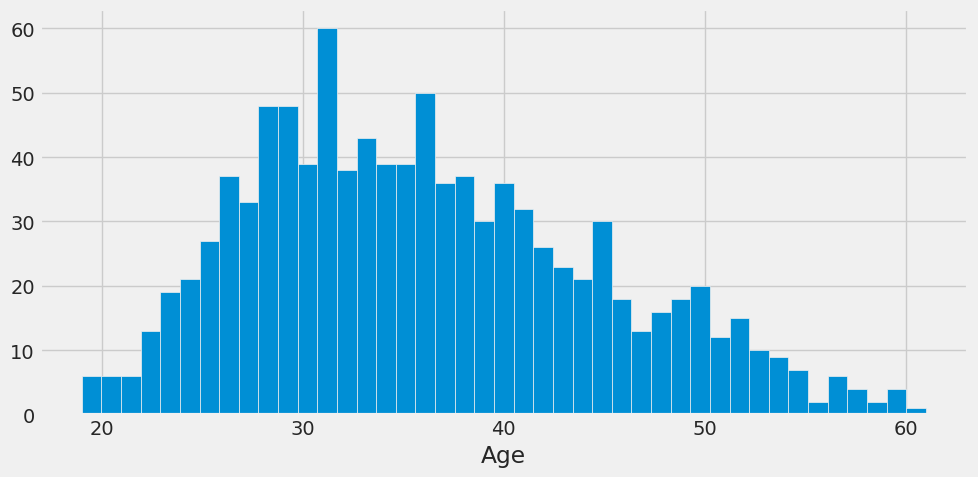

<Figure size 640x480 with 0 Axes>

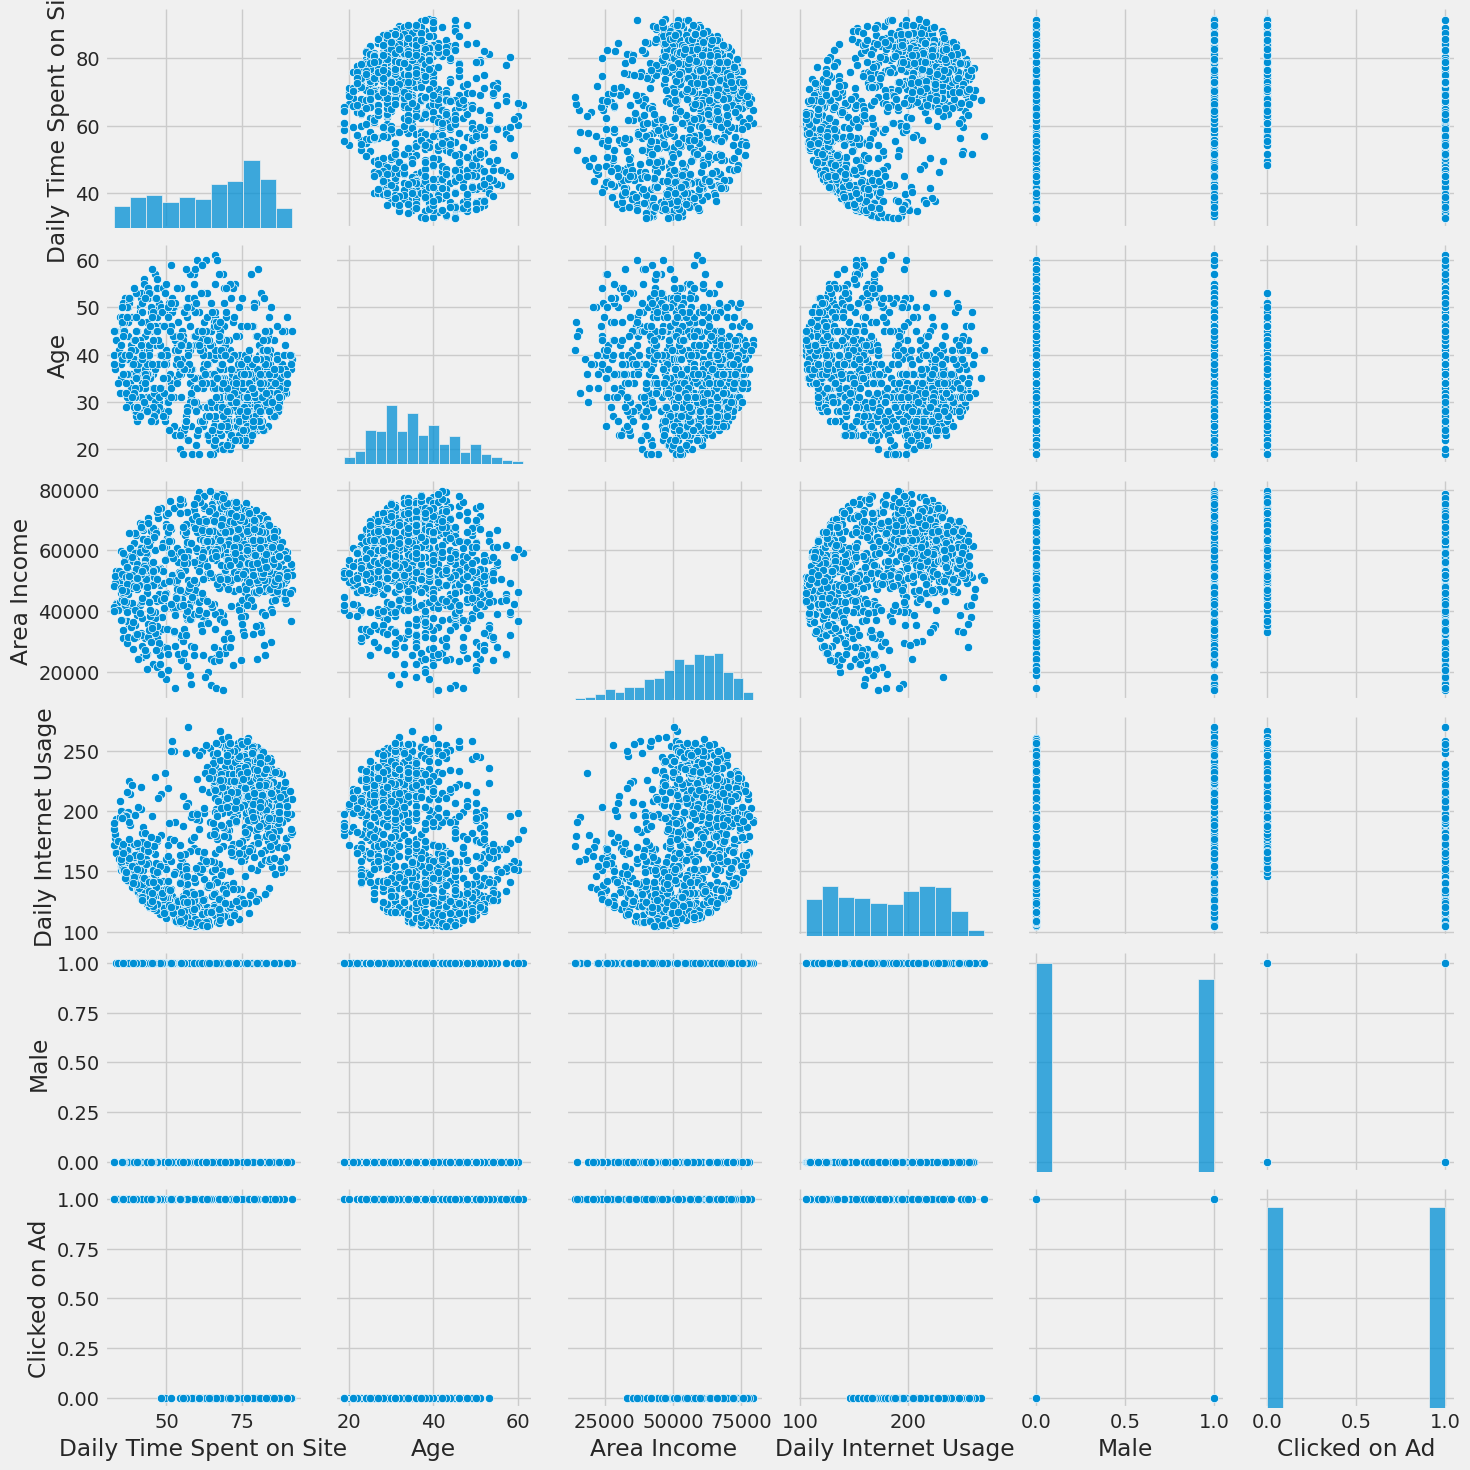

In [9]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 5))
plt.hist(data["Age"], bins = data.Age.nunique())
plt.xlabel("Age")
plt.tight_layout()
plt.show()

plt.figure()
sns.pairplot(data)
plt.show()

preprocessing

In [10]:
print("Cek missing value")
print(data.isnull().sum().sum())

Cek missing value
0


In [11]:
data = data.drop(['Ad Topic Line','City','Country','Timestamp'], axis = 1)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


split data

In [12]:
X = data.drop('Clicked on Ad', axis = 1)
y = data['Clicked on Ad']

modelling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [15]:
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))

Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9


In [16]:
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n")
print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)

Confusion matrix:
[[85  4]
 [16 95]]


Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



Kesimpulan

Berdasarkan hasil evaluasi, Model sudah sangat baik dalam memprediksi user yang akan mengklik website atau tidak, dapat dilihat dari nilai accuracy = 0.90; Dataset memiliki jumlah label yang seimbang (balance class), sehingga evaluasi performansi dapat menggunakan metrik Accuracy.

Dummy Data

In [17]:
dummy = pd.DataFrame(
    {
        "Daily Time Spent on Site" : pd.Series([80.30, 69.40, 74.20, 73.00, 51.48]),
        "Age" : pd.Series([32, 25, 27, 32, 50]),
        "Area Income" : pd.Series([68442.23, 59785.78, 54807.05, 71389.76, 42414.98]),
        "Daily Internet Usage" : pd.Series([194.12, 236.78, 246.21, 209.32, 119.87]),
        "Male" : pd.Series([1, 0, 1, 1, 1])
    }
)

In [18]:
dummy

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,80.30,32,68442.23,194.12,1
1,69.40,25,59785.78,236.78,0
2,74.20,27,54807.05,246.21,1
3,73.00,32,71389.76,209.32,1
4,51.48,50,42414.98,119.87,1


In [23]:
features = ["Daily Time Spent on Site",	"Age", "Area Income", "Daily Internet Usage", "Male"]
X = data[features]
y = data["Clicked on Ad"]

logreg = LogisticRegression()
logreg = logreg.fit(X, y)

dummy_pred = logreg.predict(dummy)
print("Prediksi Data Dummy:", dummy_pred)
print("Akurasi Data Train Sebelumnya:", previous_accuracy)

previous_accuracy = 0.90

if previous_accuracy > 0.5:
    if (dummy_pred == 1).sum() > (dummy_pred == 0).sum():
        dummy_accuracy = (dummy_pred == 1).sum() / len(dummy_pred)
    else:
        dummy_accuracy = (dummy_pred == 0).sum() / len(dummy_pred)

    print("Akurasi Data Dummy:", dummy_accuracy)

    if dummy_accuracy < previous_accuracy:
        print("Kesimpulan: Akurasi data train sebelumnya lebih tinggi dari akurasi data dummy.")
    elif dummy_accuracy == previous_accuracy:
        print("Kesimpulan: Akurasi data train sebelumnya sama dengan akurasi data dummy.")
    else:
        print("Kesimpulan: Akurasi data dummy lebih tinggi dari akurasi data train sebelumnya.")
else:
    print("Akurasi Data Train Sebelumnya: Tidak Valid")
    print("Kesimpulan: Akurasi data train sebelumnya tidak valid atau tidak dapat dibandingkan dengan data dummy.")

Prediksi Data Dummy: [0 0 0 0 1]
Akurasi Data Train Sebelumnya: 0.9
Akurasi Data Dummy: 0.8
Kesimpulan: Akurasi data train sebelumnya lebih tinggi dari akurasi data dummy.


Kesimpulan

* Prediksi Data Dummy menunjukkan bahwa model dummy memprediksi sebagian besar sampel sebagai kelas 0 (tidak mengklik iklan), kecuali satu sampel yang diprediksi sebagai kelas 1 (mengklik iklan).

* Akurasi Data Dummy adalah 0.8, yang menunjukkan bahwa model dummy memiliki tingkat akurasi yang cukup tinggi dalam memprediksi data dummy.

* Dengan demikian, kesimpulannya adalah bahwa meskipun model train sebelumnya memiliki akurasi yang lebih tinggi daripada model dummy, namun model dummy juga memiliki tingkat akurasi yang cukup tinggi. Ini menunjukkan bahwa model dummy dapat memberikan hasil yang cukup baik tanpa perlu kompleksitas yang sama seperti model sebelumnya.
